Text Classification is an example of supervised machine learning task since a labelled dataset containing text documents and their labels is used for train a classifier.

### Examples of Text classification

 1. Understanding audience sentiment from social media
 2. Detection of spam and non-spam emails
 3. Auto tagging of customer queries
 4. Categorization of news articles into defined topics.

### Text classification pipeline is composed of three main components

1. Dataset Preparation
2. Feature Engineering
3. Model Training
 

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

### Feature Engineering

1. Count Vectors as features
2. TF-IDF Vectors as features

    Word level
    N-Gram level
    Character level
3. Word Embeddings as features
4. Text / NLP based features
5. Topic Models as features

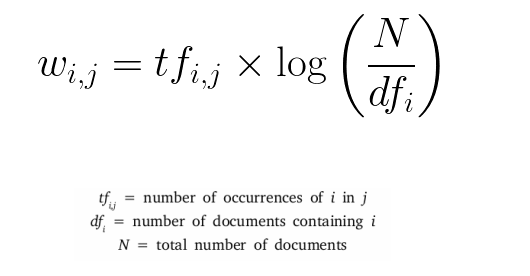

In [1]:
# Formula for Tf-idf
from IPython.display import Image
Image(filename="Formula.png")

In [2]:
s1 = 'The car is driven on the road'
s2 = 'The truck is driven on the highway'

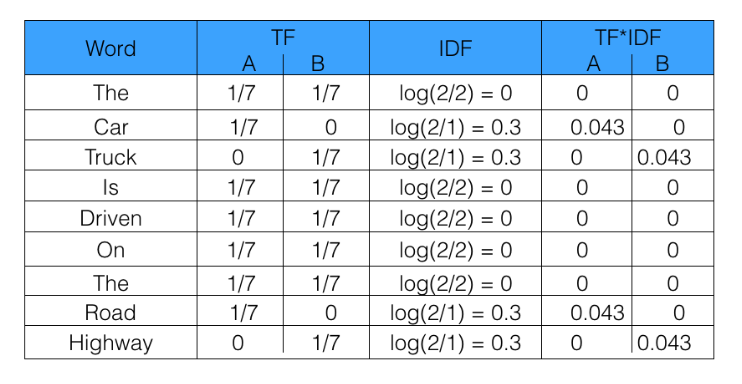

In [3]:
from IPython.display import Image
Image(filename="Tf-Idf.png")

### Text / NLP based features

A number of extra text based features can also be created which sometimes are helpful for improving text classification models. Some examples are:

- Word Count of the documents – total number of words in the documents
- Character Count of the documents – total number of characters in the documents
- Average Word Density of the documents – average length of the words used in the documents
- Puncutation Count in the Complete Essay – total number of punctuation marks in the documents
- Upper Case Count in the Complete Essay – total number of upper count words in the documents
- Title Word Count in the Complete Essay – total number of proper case (title) words in the documents
- Frequency distribution of Part of Speech Tags:
    Noun Count
    Verb Count
    Adjective Count
    Adverb Count
    Pronoun Count

In [4]:
import os
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [5]:
os.chdir('/media/swapnil/New Volume/COE/Crash_Text/Notebooks/Week_2_1')

In [6]:
df = pd.read_csv('spam_ham.txt',sep='\t',header=None, names=['label', 'text'])

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
# Converting the data into labels of 0 and 1
df['label'] = np.where(df['label']=='ham',0,1)

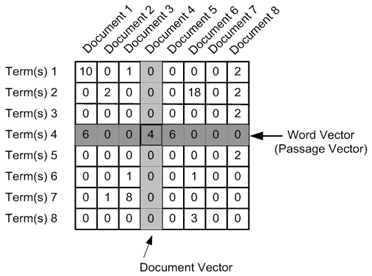

In [9]:
from IPython.display import Image
Image(filename='count_vector.png',width=500) 

## Preprocessing 

In [10]:
# Removing punctuations from the text. Below is a regular expression code for it

import re
df['text'] = [re.sub(r'[^\w\s]',' ',msg) for msg in df['text'] ]

# Converting to lower case

df['text'] = [str(comment).lower() for comment in df['text']]

In [12]:
# Functions for stemming and lemmatization.

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer('english')

def stemming(text):
    text = text.split()
    return ' '.join([stemmer.stem(word) for word in text])

lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    text = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in text])


def remove_stopwords(text):
    text = text.split()
    return ' '.join([word for word in text if word not in stops])


# Calling the function in the loop
clean_text = [remove_stopwords(msg) for msg in df['text']]
stemm_text = [stemming(msg) for msg in clean_text]

**We will use scikit to extract the word counts**

In [37]:
#Importing the count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Initializing the vectorizer
count_vect = CountVectorizer()

#Transforming the words to vectors
X_train_counts = count_vect.fit_transform(stemm_text)

In [38]:
count_vect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [39]:
# Total number of features from the data
len(count_vect.get_feature_names())

7250

In [40]:
# Shape of the matrix
X_train_counts

<5572x7250 sparse matrix of type '<class 'numpy.int64'>'
	with 47079 stored elements in Compressed Sparse Row format>

In [41]:
#Importing NB Classifier
from sklearn.naive_bayes import MultinomialNB

#Initializing the classfier
clf = MultinomialNB()

#Setting the x and y for the model
y = df['label']
x = X_train_counts

#Fitting the model with the x and y values
clf.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Testing the classifier

In [47]:
test_cases = ['URGENT! Your Mobile No. was awarded £2000 Bonus Caller Prize' , 'Meet me near Principal\'s office',
             'Get awarded free recharge for life by subscribing to free caller tunes']

test_cases = count_vect.transform(test_cases)


clf.predict(test_cases)

array([1, 0, 1])

### Spliting the data into train and test

In [48]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70:30 ratio (70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.30, random_state=100)

In [49]:
count_vect = CountVectorizer()

X_train_features = count_vect.fit_transform(X_train)

X_test_features = count_vect.transform(X_test)

In [50]:
# Training the model on the train set and predicting on test set 

clf = MultinomialNB()

clf.fit(X_train_features,y_train)

y_pred = clf.predict(X_test_features)

#### Checking model performance

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy: {:.2f} \nprecision: {:.2f} \nrecall: {:.2f} \nf1: {:.2f}'.format(accuracy, precision, recall, f1))

accuracy: 0.99 
precision: 0.98 
recall: 0.92 
f1: 0.95


In [52]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1448
          1       0.98      0.92      0.95       224

avg / total       0.99      0.99      0.99      1672



### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_features, y_train)

y_pred = lr.predict(X_test_features)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy: {:.2f} \nprecision: {:.2f} \nrecall: {:.2f} \nf1: {:.2f}'.format(accuracy, precision, recall, f1))

accuracy: 0.98 
precision: 0.99 
recall: 0.88 
f1: 0.94


### TF-IDF Features

In [55]:
#Importing the count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Initializing the vectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,4), analyzer='word', 
                            max_df=0.8, min_df=2)

X_train_features_word = tfidf_vec.fit_transform(X_train)

X_test_features_word = tfidf_vec.transform(X_test)

In [56]:
X_train_features_word

<3900x19215 sparse matrix of type '<class 'numpy.float64'>'
	with 98502 stored elements in Compressed Sparse Row format>

In [57]:
#Importing the count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Initializing the vectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(3,5), analyzer='char', 
                            max_df=0.8, min_df=10)

X_train_features_char = tfidf_vec.fit_transform(X_train)

X_test_features_char = tfidf_vec.transform(X_test)

In [58]:
X_train_features_char

<3900x14081 sparse matrix of type '<class 'numpy.float64'>'
	with 629061 stored elements in Compressed Sparse Row format>

In [59]:
from scipy.sparse import hstack

full_features_train = hstack([X_train_features_word, X_train_features_char])
full_features_test = hstack([X_test_features_word, X_test_features_char])

### Checking the shape of the train and test data matrix

In [60]:
full_features_train

<3900x33296 sparse matrix of type '<class 'numpy.float64'>'
	with 727563 stored elements in COOrdinate format>

In [61]:
full_features_test

<1672x33296 sparse matrix of type '<class 'numpy.float64'>'
	with 290090 stored elements in COOrdinate format>

**We will use these combined 'char' and 'word' features for classification model**

In [62]:
clf = MultinomialNB()
clf.fit(full_features_train,y_train)

y_pred = clf.predict(full_features_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy: {:.2f} \nprecision: {:.2f} \nrecall: {:.2f} \nf1: {:.2f}'.format(accuracy, precision, recall, f1))

accuracy: 0.98 
precision: 0.99 
recall: 0.83 
f1: 0.90


### Text / NLP based features

In [63]:
df = pd.read_csv('spam_ham.txt',sep='\t',header=None, names=['label', 'text'])

In [64]:
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 

df[:5]

,label,text,char_count,word_count,word_density,punctuation_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,5.285714,9
1,ham,Ok lar... Joking wif u oni...,29,6,4.142857,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,5.344828,6
3,ham,U dun say so early hor... U c already then say...,49,11,4.083333,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,4.357143,2


**Repeat the classification process by adding/creating and adding more features**